In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets


In [2]:
iris = datasets.load_iris()

In [6]:
iris.data[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [8]:
print(iris.feature_names)
print(iris.target_names)


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [9]:
import pandas as pd
df=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
df.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


##### Check if the dataset is balanced or not

In [12]:
df['species'].value_counts()
# Balanced Dataset

2    50
1    50
0    50
Name: species, dtype: int64

### Now we will try to implement DTree with -
#### 1. Entropy
#### 2. Gini Index

In [14]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x=df[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
y=df['species']  # Labels

scaler = StandardScaler()
scaler.fit(x)

x = scaler.transform(x)

# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3) # 70% training and 30% test

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection

dtree = DecisionTreeClassifier(criterion="entropy", max_depth = 4, min_samples_split =2)
dtree.fit(x_train, y_train)
print("********InformationGain-Entropy as Split Measure******** \n");
print("Look at the importance of the included features")
feature_imp_en = pd.Series(dtree.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
print(feature_imp_en)
print("Training  Accuracy")
print(dtree.score(x_train, y_train))

cross_val_acc = model_selection.cross_val_score(dtree,x,y,cv=5, scoring ="accuracy")
print("Cross validation Accuracy Mean - ")
print(cross_val_acc.mean())

print("Cross validation Standard Deviation - ")
print(cross_val_acc.std())

y_pred=dtree.predict(x_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Test Accuracy:",metrics.accuracy_score(y_test, y_pred))

********InformationGain-Entropy as Split Measure******** 

Look at the importance of the included features
petal width (cm)     0.924084
petal length (cm)    0.046673
sepal length (cm)    0.029243
sepal width (cm)     0.000000
dtype: float64
Training  Accuracy
0.9904761904761905
Cross validation Accuracy Mean - 
0.9533333333333334
Cross validation Standard Deviation - 
0.03399346342395189
Test Accuracy: 0.9333333333333333


#### Visualizing the split that Entropy helped in creating

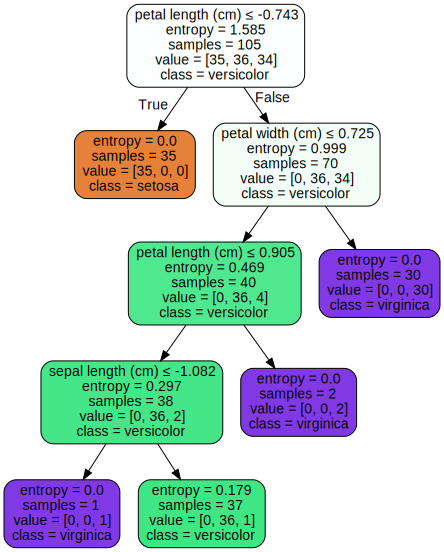

In [24]:
import graphviz 
from sklearn import tree
dot_data = tree.export_graphviz(dtree, out_file=None, 
                      feature_names=iris.feature_names,  
                      class_names=iris.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [29]:
#Create a Gaussian Classifier
GTree=DecisionTreeClassifier(max_depth = 4, min_samples_split=2)

#Train the model using the training sets y_pred=clf.predict(X_test)
GTree.fit(x_train,y_train)

print("********Ginni Index as Split Measure******** \n");
print("Look at the importance of the included features")
feature_imp_gi = pd.Series(GTree.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
print(feature_imp_gi)

print("Training  Accuracy")
print(GTree.score(x_train, y_train))

Cross_Val_Accuracy = model_selection.cross_val_score(GTree, x, 
                                            y, cv=5,
                                            scoring='accuracy')

print("cross validation Accuracy Mean and standard deviation")
print(Cross_Val_Accuracy.mean(), Cross_Val_Accuracy.std())


y_pred=GTree.predict(x_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Test Accuracy:",metrics.accuracy_score(y_test, y_pred))

********Ginni Index as Split Measure******** 

Look at the importance of the included features
petal length (cm)    0.564710
petal width (cm)     0.408193
sepal length (cm)    0.027097
sepal width (cm)     0.000000
dtype: float64
Training  Accuracy
0.9904761904761905
cross validation Accuracy Mean and standard deviation
0.9600000000000002 0.03265986323710903
Test Accuracy: 0.9333333333333333


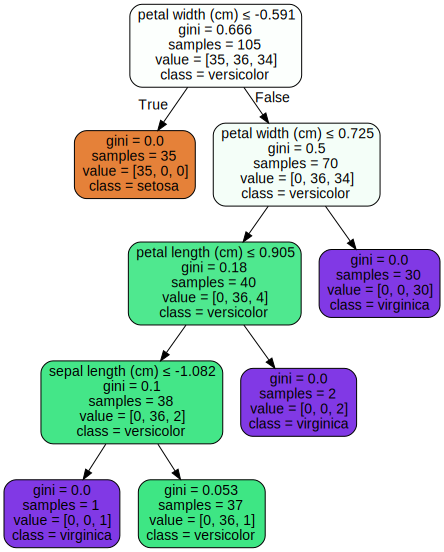

In [26]:
import graphviz 
dot_data = tree.export_graphviz(GTree, out_file=None, 
                      feature_names=iris.feature_names,  
                      class_names=iris.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

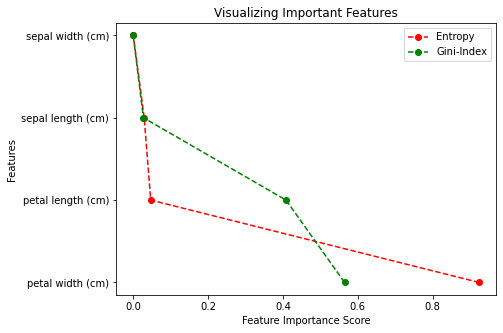

In [47]:
# Copmaring the importance given to each feature in Gini INdex and Entropy

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(feature_imp_en,feature_imp_en.index,'o--', color='red')
# plt.step(feature_imp_en,feature_imp_en.index)
plt.plot(feature_imp_gi,feature_imp_en.index,'o--', color='green')

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend(['Entropy', 'Gini-Index'])
plt.show()


### Depth of Tree vs Accuracy | Entropy

In [54]:
# initialize the values of height for our desicion tree classifier along with the
# list of accuracies for each value of depth
depth = range(1, 6)
acc = []

for i in range(1,6):
    model = DecisionTreeClassifier(criterion="entropy",max_depth = i, min_samples_split=2)
    Cross_Val_Accuracy = model_selection.cross_val_score(model, x, 
                                            y, cv=5,
                                            scoring='accuracy')
    print("height=%d, accuracy=%.2f%%" % (i, Cross_Val_Accuracy.mean() * 100))
    acc.append(Cross_Val_Accuracy.mean())
    
#find the value of depth that has the largest accuracy
i = int(np.argmax(acc))
print("Height=%d highest accuracy which can be achieved at this height is %.2f%% (Cross Validation)" % (depth[i],
    acc[i] * 100))

height=1, accuracy=66.67%
height=2, accuracy=93.33%
height=3, accuracy=96.00%
height=4, accuracy=95.33%
height=5, accuracy=95.33%
Height=3 highest accuracy which can be achieved at this height is 96.00% (Cross Validation)


### Depth of Tree vs Accuracy | Gini Index

In [60]:
# initialize the values of height for our desicion tree classifier along with the
# list of accuracies for each value of depth
depth = range(1, 6)
acc = []

for i in range(1,6):
    model = DecisionTreeClassifier(max_depth = i, min_samples_split=2)
    Cross_Val_Accuracy = model_selection.cross_val_score(model, x, 
                                            y, cv=5,
                                            scoring='accuracy')
    print("height=%d, accuracy=%.2f%%" % (i, Cross_Val_Accuracy.mean() * 100))
    acc.append(Cross_Val_Accuracy.mean())
    
#find the value of depth that has the largest accuracy
i = int(np.argmax(acc))
print("Height=%d highest accuracy which can be achieved at this height is %.2f%% (Cross Validation)" % (depth[i],
    acc[i] * 100))

height=1, accuracy=66.67%
height=2, accuracy=93.33%
height=3, accuracy=97.33%
height=4, accuracy=95.33%
height=5, accuracy=96.00%
Height=3 highest accuracy which can be achieved at this height is 97.33% (Cross Validation)


#### Traininng the complete model finally and the tuning the Hyperparameters
#### Note: The accuracy was max at height = 3, hence before tuning the depth using GridSearchCV, the above mentioned value will be considered

In [65]:
# Final Model 
from sklearn.metrics import classification_report, confusion_matrix
model = DecisionTreeClassifier(max_depth = 3, min_samples_split=2)
model.fit(x_train,y_train)

predictions = model.predict(x_test)
print(confusion_matrix(y_test, predictions))
 
# show a final classification report demonstrating the accuracy of the classifier
print("EVALUATION ON TESTING DATA")
print(classification_report(y_test, predictions))

print("Final  Accuracy")
print(model.score(x_test, y_test))



[[15  0  0]
 [ 0 13  1]
 [ 0  1 15]]
EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      0.93      0.93        14
           2       0.94      0.94      0.94        16

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

Final  Accuracy
0.9555555555555556


In [74]:
from sklearn.model_selection import GridSearchCV
model = DecisionTreeClassifier(min_samples_split=2)
tuned_parameters = [{'max_depth': [1,2,3,4,5,6,8,9,10,11,12,13,14,15,16,17,20], 'criterion':['gini','entropy']}]
clf = GridSearchCV(model, tuned_parameters, cv=5)

clf.fit(x_train,y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)


print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
print()


Best parameters set found on development set:

{'criterion': 'gini', 'max_depth': 4}
Grid scores on development set:

0.676 (+/-0.038) for {'criterion': 'gini', 'max_depth': 1}
0.952 (+/-0.085) for {'criterion': 'gini', 'max_depth': 2}
0.943 (+/-0.093) for {'criterion': 'gini', 'max_depth': 3}
0.962 (+/-0.071) for {'criterion': 'gini', 'max_depth': 4}
0.943 (+/-0.111) for {'criterion': 'gini', 'max_depth': 5}
0.952 (+/-0.085) for {'criterion': 'gini', 'max_depth': 6}
0.952 (+/-0.085) for {'criterion': 'gini', 'max_depth': 8}
0.952 (+/-0.085) for {'criterion': 'gini', 'max_depth': 9}
0.952 (+/-0.085) for {'criterion': 'gini', 'max_depth': 10}
0.943 (+/-0.111) for {'criterion': 'gini', 'max_depth': 11}
0.952 (+/-0.085) for {'criterion': 'gini', 'max_depth': 12}
0.943 (+/-0.071) for {'criterion': 'gini', 'max_depth': 13}
0.943 (+/-0.071) for {'criterion': 'gini', 'max_depth': 14}
0.952 (+/-0.085) for {'criterion': 'gini', 'max_depth': 15}
0.943 (+/-0.071) for {'criterion': 'gini', 'max_de

In [77]:
# re-train our classifier using the best parametric values found above
# criterion =  Gini, depth =4
from sklearn.metrics import classification_report, confusion_matrix
model = DecisionTreeClassifier(criterion="gini",max_depth = 4, min_samples_split=2)
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(confusion_matrix(y_test, predictions))
 
# show a final classification report demonstrating the accuracy of the classifier
# for each of the digits
print("EVALUATION ON TESTING DATA")
print(classification_report(y_test, predictions))

[[15  0  0]
 [ 0 12  2]
 [ 0  1 15]]
EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.92      0.86      0.89        14
           2       0.88      0.94      0.91        16

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



In [85]:
model.score(x_test,y_test)

0.9333333333333333

#### Ensembling Techniques
#### 1. Random Forest
#### 2. Bagging Different Models

In [86]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_features='auto', min_samples_split=2,n_estimators = 20, random_state = 1)
tuned_parameters = [{'max_depth': [1,2,3,4,5,6,8,9,10,11,12,13,14,15,16,17,20], 'criterion':['gini','entropy'],
                    'n_estimators' : [50, 100, 150, 200, 250, 300, 350, 400]}]
clf = GridSearchCV(model, tuned_parameters, cv=5)

clf.fit(x_train,y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)


print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
print()


Best parameters set found on development set:

{'criterion': 'entropy', 'max_depth': 3, 'n_estimators': 250}
Grid scores on development set:

0.952 (+/-0.085) for {'criterion': 'gini', 'max_depth': 1, 'n_estimators': 50}
0.952 (+/-0.085) for {'criterion': 'gini', 'max_depth': 1, 'n_estimators': 100}
0.952 (+/-0.085) for {'criterion': 'gini', 'max_depth': 1, 'n_estimators': 150}
0.952 (+/-0.085) for {'criterion': 'gini', 'max_depth': 1, 'n_estimators': 200}
0.952 (+/-0.085) for {'criterion': 'gini', 'max_depth': 1, 'n_estimators': 250}
0.952 (+/-0.085) for {'criterion': 'gini', 'max_depth': 1, 'n_estimators': 300}
0.952 (+/-0.085) for {'criterion': 'gini', 'max_depth': 1, 'n_estimators': 350}
0.952 (+/-0.085) for {'criterion': 'gini', 'max_depth': 1, 'n_estimators': 400}
0.943 (+/-0.093) for {'criterion': 'gini', 'max_depth': 2, 'n_estimators': 50}
0.952 (+/-0.085) for {'criterion': 'gini', 'max_depth': 2, 'n_estimators': 100}
0.943 (+/-0.093) for {'criterion': 'gini', 'max_depth': 2, '

In [87]:
# re-train our classifier using the best parametric values found above
# criterion =  Entropy, depth =3, n_estimators = 250
from sklearn.metrics import classification_report, confusion_matrix
model = RandomForestClassifier(criterion="entropy",max_depth = 3, min_samples_split=2,n_estimators = 250)
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print ("Accuracy Score - ")
print(model.score(x_test, y_test))
print(confusion_matrix(y_test, predictions))
 
# show a final classification report demonstrating the accuracy of the classifier
# for each of the digits
print("EVALUATION ON TESTING DATA")
print(classification_report(y_test, predictions))

Accuracy Score - 
0.9555555555555556
[[15  0  0]
 [ 0 13  1]
 [ 0  1 15]]
EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      0.93      0.93        14
           2       0.94      0.94      0.94        16

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



### Extremely Randomized Trees


In extremely randomized trees (see ExtraTreesClassifier and ExtraTreesRegressor classes), randomness goes one step further in the way splits are computed. As in random forests, a random subset of candidate features is used, but instead of looking for the most discriminative thresholds, thresholds are drawn at random for each candidate feature and the best of these randomly-generated thresholds is picked as the splitting rule. This usually allows to reduce the variance of the model a bit more, at the expense of a slightly greater increase in bias:

In [95]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import ExtraTreesClassifier


clf = ExtraTreesClassifier(criterion="entropy",max_depth = 4, min_samples_split=2, random_state = 1)
scores = cross_val_score(clf, x_train, y_train, cv=5)
print(scores)

clf.fit(x_train, y_train)

print(clf.score(x_test, y_test))

if (clf.score(x_test, y_test)-scores.mean()):
    print("OverFitted Model")

[0.9047619  0.9047619  0.95238095 1.         1.        ]
0.9555555555555556
OverFitted Model


# Ensembling- Hard Voting

### In order to predict the class labels based on the predicted class-probabilities (scikit-learn estimators in the VotingClassifier must support predict_proba method):

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(n_estimators=50,max_depth=4, random_state=1)
clf3 = GaussianNB()

eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')

#eclf.fit(X_train, y_train)
#print("Final  Accuracy")
#print(eclf.score(X, y))


for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
# Here comes a scenario where the training data's feature engineering would vary according to the algorithm being used
# To fix it, we can check if clf == clf1, train on different data
    scores = cross_val_score(clf, x_train, y_train, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))


Accuracy: 0.95 (+/- 0.04) [Logistic Regression]
Accuracy: 0.95 (+/- 0.04) [Random Forest]
Accuracy: 0.96 (+/- 0.04) [naive Bayes]
Accuracy: 0.96 (+/- 0.04) [Ensemble]


### Weighted Average Probabilities (Soft Voting)

In [97]:
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(n_estimators=50,max_depth=4, random_state=1)
clf3 = GaussianNB()

eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft', weights=[1.5, 2, 1])

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
    scores = cross_val_score(clf, x_train, y_train, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.95 (+/- 0.04) [Logistic Regression]
Accuracy: 0.95 (+/- 0.04) [Random Forest]
Accuracy: 0.96 (+/- 0.04) [naive Bayes]
Accuracy: 0.96 (+/- 0.04) [Ensemble]


### Using the VotingClassifier with GridSearchCV

In [100]:
from sklearn.model_selection import GridSearchCV

clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft', weights=[1.5, 2, 1])




params = {'lr__C': [1.0,2,3,4,5], 'rf__max_depth': [1,2,3,4,5]}

grid = GridSearchCV(estimator=eclf, param_grid=params, cv=5)

grid = grid.fit(x_train, y_train)
means = grid.cv_results_['mean_test_score']
print(means.mean())

0.9619047619047617
